# 残差分析

In [1]:
// %jsroot on
TFile *ipf = new TFile("../data/tracking.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1 = new TCanvas;
TF1 *f1;
Double_t sigmaX[11], sigmaY[16];
Double_t sigmaAllX[5], sigmaAllY[5]; // 5个探测器都用上的残差分析，用于模拟

## x方向残差

### PPAC1A x

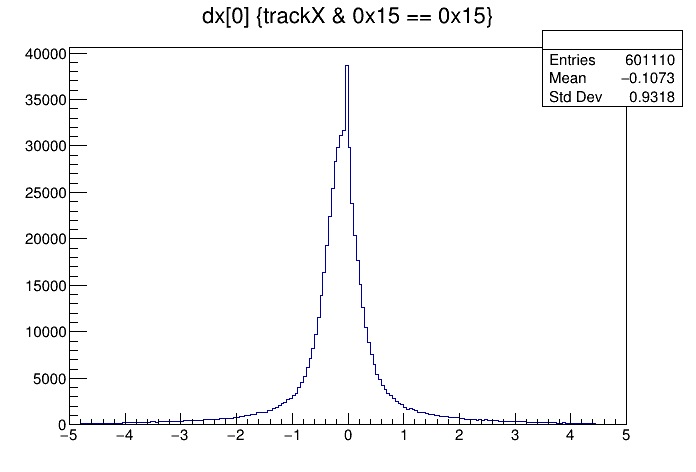

In [64]:
tree->Draw("dx[0]>>(200, -5, 5)", "trackX & 0x15 == 0x15");
c1->Draw();
gPad->SetLogy(0);


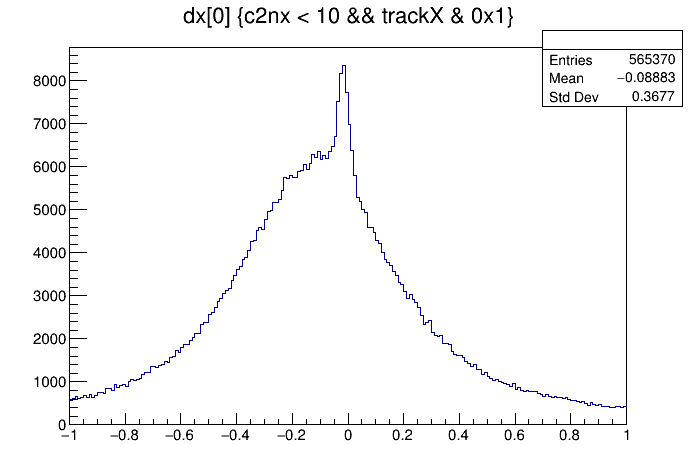

In [2]:
tree->Draw("dx[0]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x1");
c1->Draw();

发现是两个峰的叠加，有可能是不同位置分辨率不同的原因？要验证该想法，可以取小范围内的径迹进行验证，比如只取穿过1A,2A,3探测器中间部分的粒子。

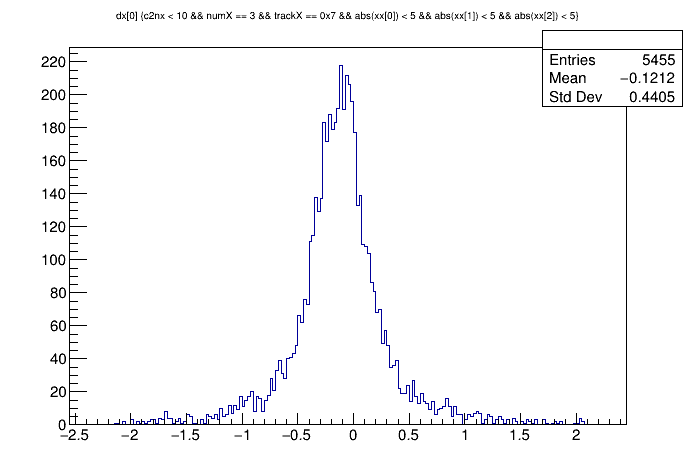

In [3]:
tree->Draw("dx[0]>>(200, -1, -1)", "c2nx < 10 && numX == 3 && trackX == 0x7 && abs(xx[0]) < 5 && abs(xx[1]) < 5 && abs(xx[2]) < 5");
c1->Draw();

似乎只有一个高斯峰了，改变条件看是哪个条件起作用

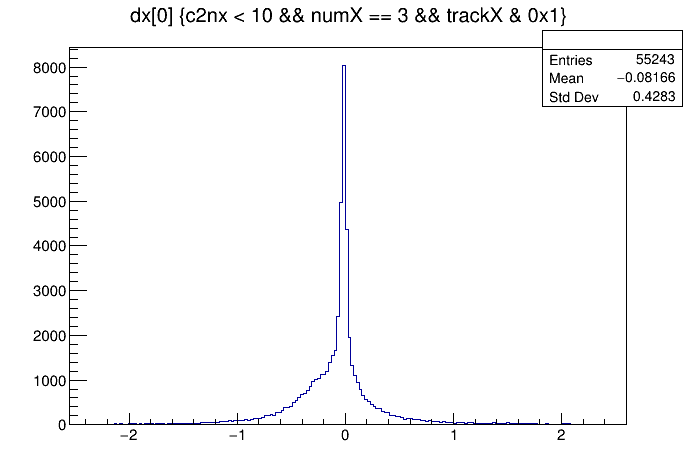

In [4]:
tree->Draw("dx[0]>>(200, -1, -1)", "c2nx < 10 && numX == 3 && trackX & 0x1");
c1->Draw();

发现两个峰叠加很可能和用于拟合径迹的探测器数量有关

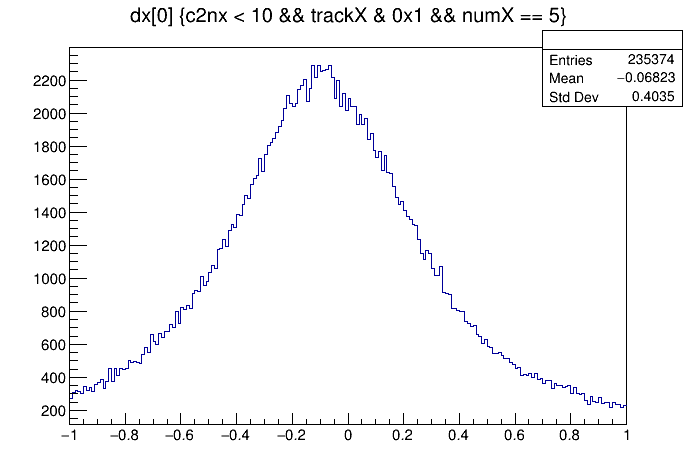

In [5]:
tree->Draw("dx[0]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x1 && numX == 5");
c1->Draw();

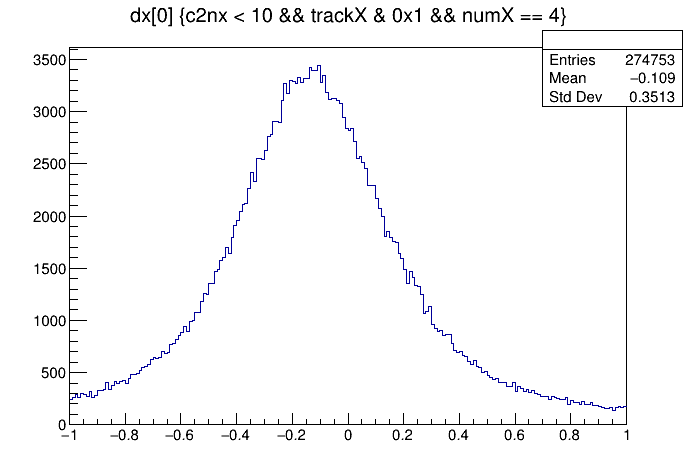

In [6]:
tree->Draw("dx[0]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x1 && numX == 4");
c1->Draw();

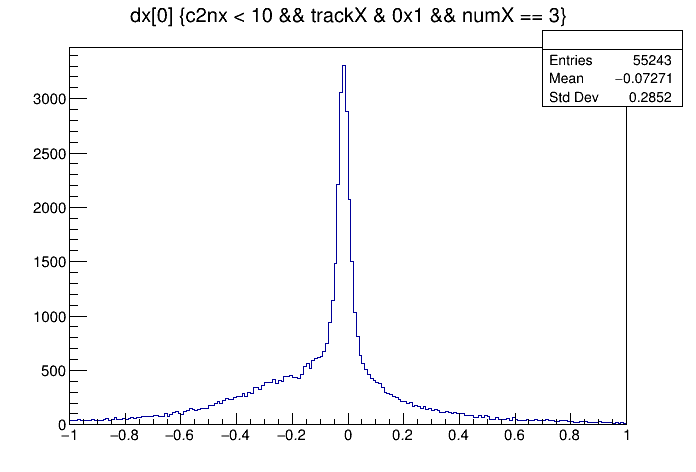

In [7]:
tree->Draw("dx[0]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x1 && numX == 3");
c1->Draw();

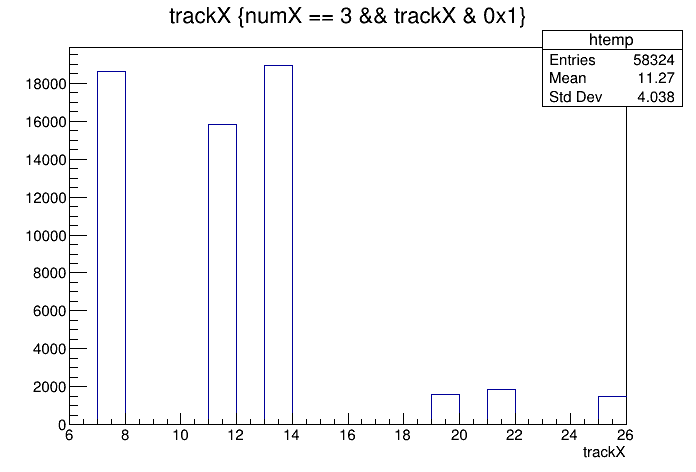

In [8]:
tree->Draw("trackX", "numX == 3 && trackX & 0x1");
c1->Draw();

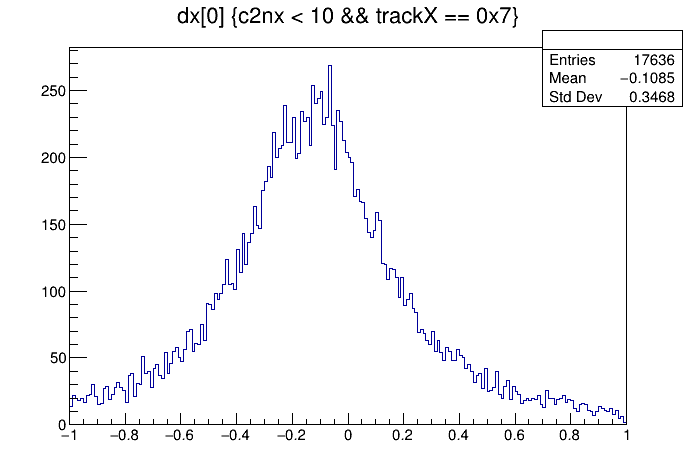

In [9]:
tree->Draw("dx[0]>>(200, -1, 1)", "c2nx < 10 && trackX == 0x7");
c1->Draw();

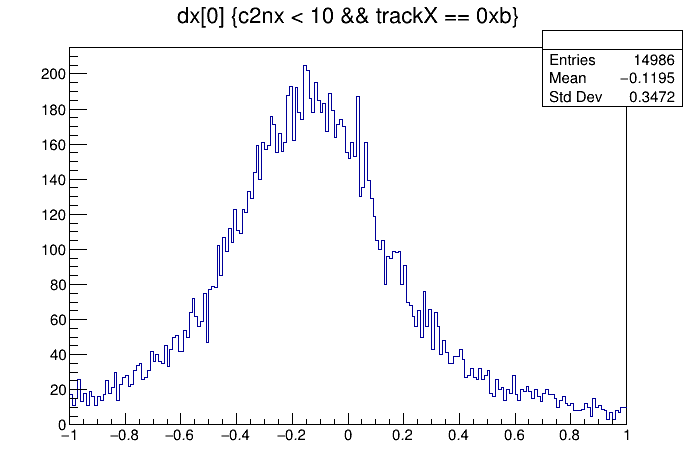

In [10]:
tree->Draw("dx[0]>>(200, -1, 1)", "c2nx < 10 && trackX == 0xb");
c1->Draw();

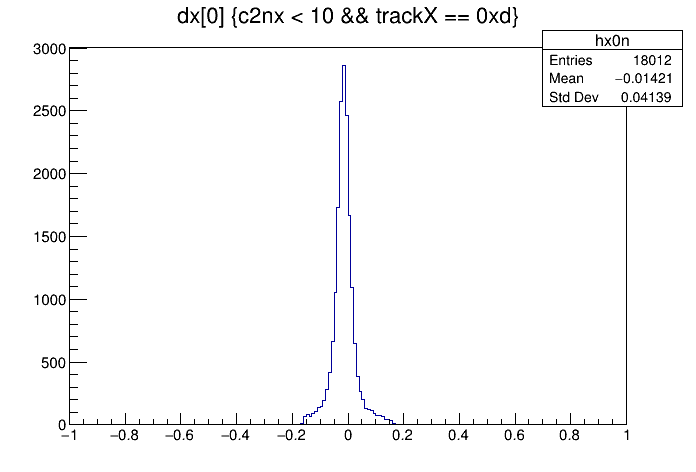

In [11]:
tree->Draw("dx[0]>>hx0n(200, -1, 1)", "c2nx < 10 && trackX == 0xd");
c1->Draw();

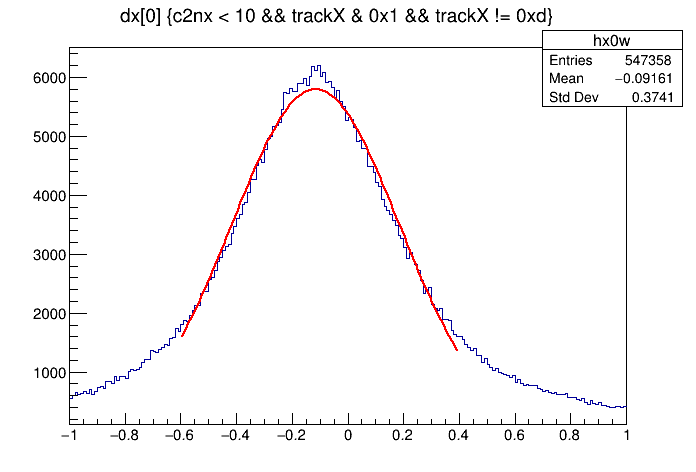

 FCN=742.464 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=1.01728e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.79242e+03   1.27378e+01   1.22930e-01  -2.79054e-05
   2  Mean        -1.14636e-01   6.00719e-04   7.98798e-06  -1.41280e-02
   3  Sigma        2.99709e-01   7.16561e-04   8.73450e-06   1.38045e-01


In [12]:
tree->Draw("dx[0]>>hx0w(200, -1, 1)", "c2nx < 10 && trackX & 0x1 && trackX != 0xd");
TH1D *hx0w = (TH1D*)gDirectory->Get("hx0w");
f1 = new TF1("f1", "gaus", -0.6, 0.4);
hx0w->Fit(f1, "R");
sigmaX[0] = f1->GetParameter(2);
delete f1;
c1->Draw();

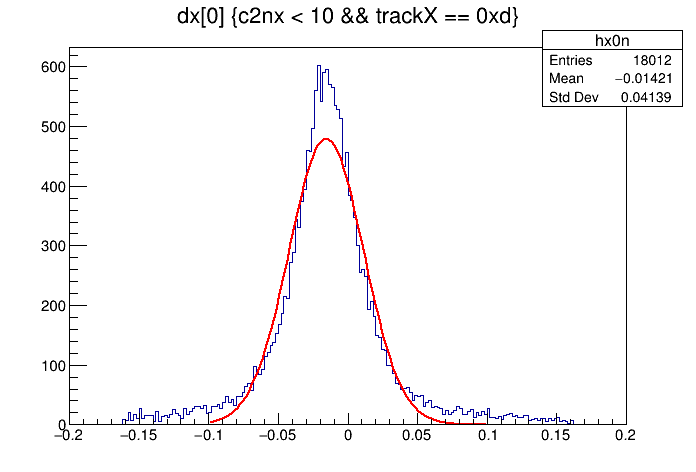

 FCN=1038.88 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=5.03549e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.79084e+02   5.63028e+00   5.95247e-02  -3.21999e-06
   2  Mean        -1.51641e-02   2.12134e-04   3.34003e-06   7.85775e-02
   3  Sigma        2.67678e-02   2.35039e-04   2.84619e-05  -1.39964e-02


In [13]:
tree->Draw("dx[0]>>hx0n(200, -0.2, 0.2)", "c2nx < 10 && trackX == 0xd");
TH1D *hx0n = (TH1D*)gDirectory->Get("hx0n");
f1 = new TF1("f1", "gaus", -0.1, 0.1);
hx0n->Fit(f1, "R");
sigmaX[1] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC1B x

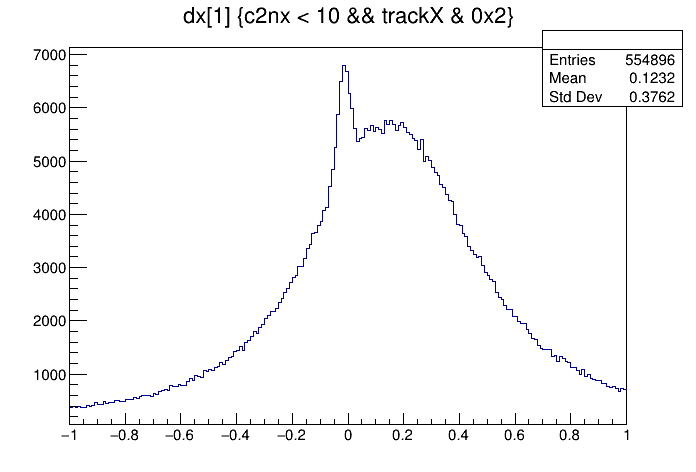

In [14]:
tree->Draw("dx[1]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x2");
c1->Draw();

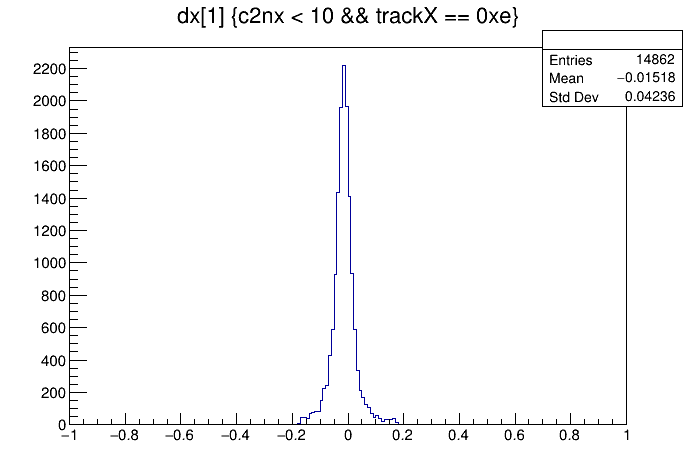

In [15]:
tree->Draw("dx[1]>>(200, -1, 1)", "c2nx < 10 && trackX == 0xe");
c1->Draw();

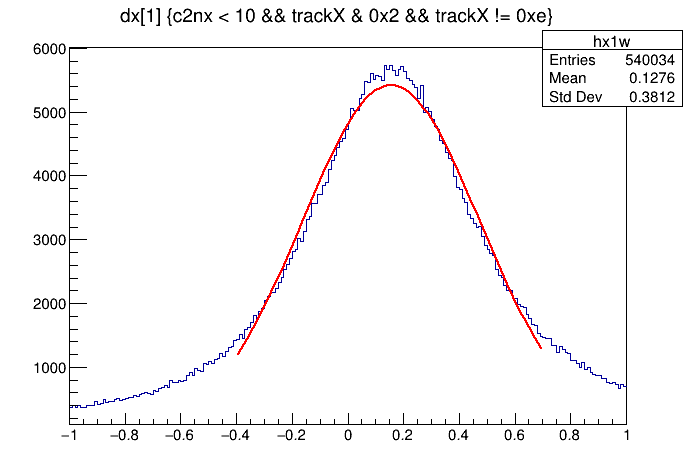

 FCN=936.891 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=1.03523e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.41596e+03   1.18652e+01   1.28722e-01  -9.65162e-06
   2  Mean         1.56952e-01   6.22438e-04   9.30333e-06  -1.45145e-02
   3  Sigma        3.18377e-01   7.25772e-04   9.25117e-06   4.51630e-02


In [16]:
tree->Draw("dx[1]>>hx1w(200, -1, 1)", "c2nx < 10 && trackX & 0x2 && trackX != 0xe");
TH1D *hx1w = (TH1D*)gDirectory->Get("hx1w");
f1 = new TF1("f1", "gaus", -0.4, 0.7);
hx1w->Fit(f1, "R");
sigmaX[2] = f1->GetParameter(2);
delete f1;
c1->Draw();

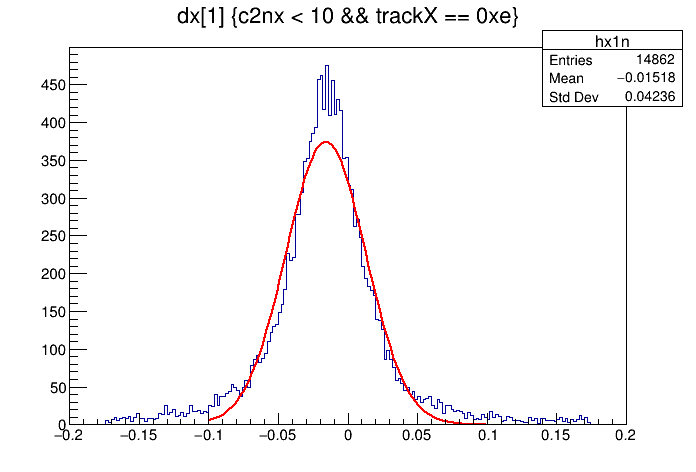

 FCN=727.343 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=1.75951e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.73960e+02   4.72181e+00   4.25497e-02   3.73296e-05
   2  Mean        -1.54762e-02   2.49954e-04   3.28756e-06  -5.72812e-01
   3  Sigma        2.86682e-02   2.68347e-04   2.64885e-05   3.81270e-02


In [17]:
tree->Draw("dx[1]>>hx1n(200, -0.2, 0.2)", "c2nx < 10 && trackX == 0xe");
TH1D *hx1n = (TH1D*)gDirectory->Get("hx1n");
f1 = new TF1("f1", "gaus", -0.1, 0.1);
hx1n->Fit(f1, "R");
sigmaX[3] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC2A x

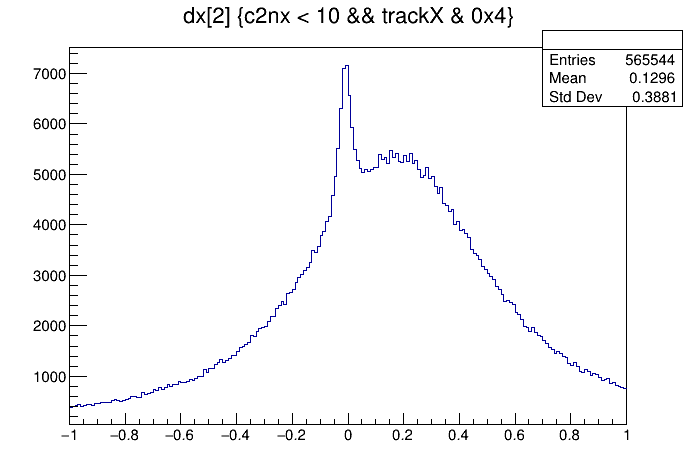

In [18]:
tree->Draw("dx[2]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x4");
c1->Draw();

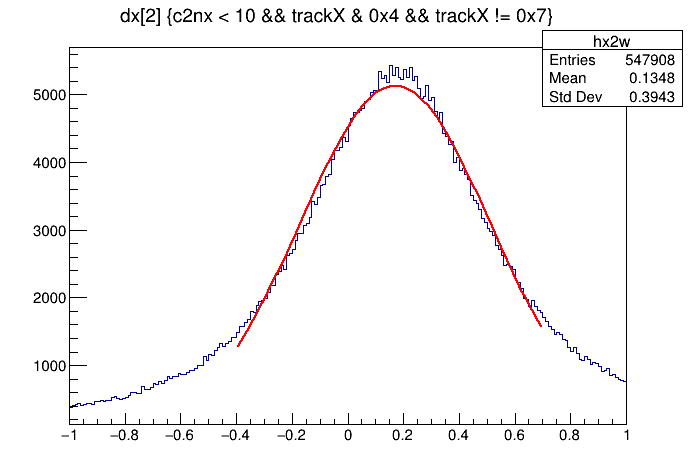

 FCN=662.01 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=5.04753e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.12491e+03   1.13551e+01   1.03100e-01  -6.97091e-05
   2  Mean         1.71748e-01   7.00618e-04   8.77581e-06   1.47796e-02
   3  Sigma        3.40415e-01   8.58504e-04   8.75428e-06   2.87757e-01


In [19]:
tree->Draw("dx[2]>>hx2w(200, -1, 1)", "c2nx < 10 && trackX & 0x4 && trackX != 0x7");
TH1D *hx2w = (TH1D*)gDirectory->Get("hx2w");
f1 = new TF1("f1", "gaus", -0.4, 0.7);
hx2w->Fit(f1, "R");
sigmaX[4] = f1->GetParameter(2);
delete f1;
c1->Draw();

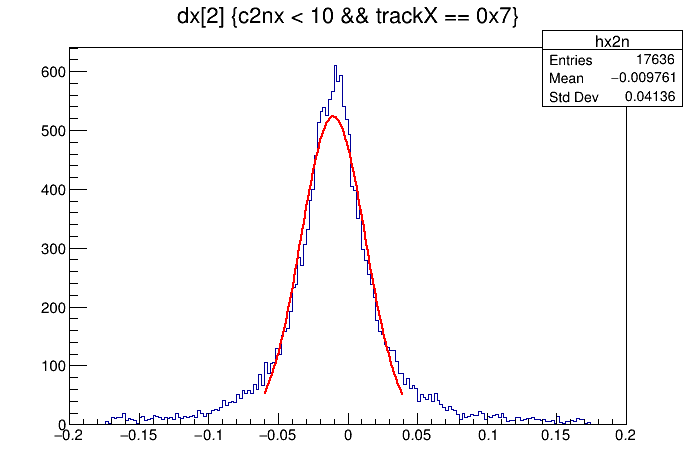

 FCN=213.487 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=4.02898e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.23041e+02   5.97098e+00   3.08760e-02   2.30154e-06
   2  Mean        -1.02160e-02   2.09247e-04   1.49634e-06  -5.20689e-02
   3  Sigma        2.30843e-02   2.19439e-04   1.71723e-05   2.95335e-02


In [20]:
tree->Draw("dx[2]>>hx2n(200, -0.2, 0.2)", "c2nx < 10 && trackX == 0x7");
TH1D *hx2n = (TH1D*)gDirectory->Get("hx2n");
f1 = new TF1("f1", "gaus", -0.06, 0.04);
hx2n->Fit(f1, "R");
sigmaX[5] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC2B x

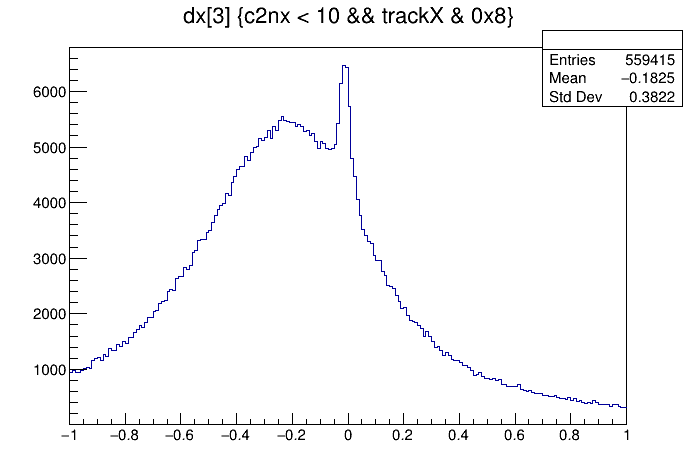

In [21]:
tree->Draw("dx[3]>>(200, -1, 1)", "c2nx < 10 && trackX & 0x8");
c1->Draw();

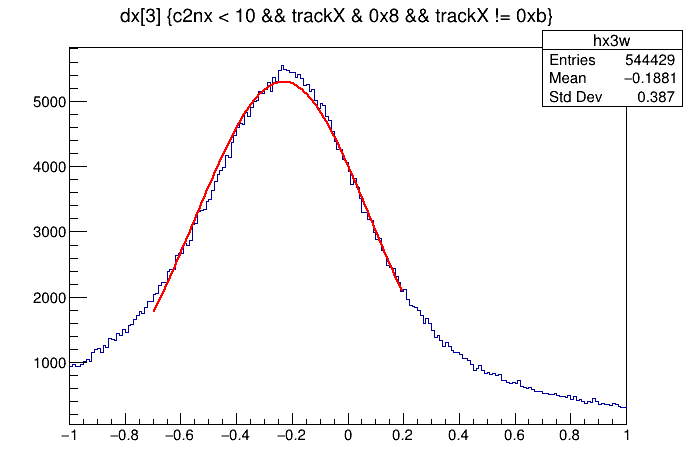

 FCN=379.712 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=7.23198e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.29265e+03   1.24581e+01   1.08455e-01  -2.36744e-05
   2  Mean        -2.31778e-01   7.36811e-04   7.89730e-07  -6.10078e-02
   3  Sigma        3.13976e-01   9.99968e-04  -9.63950e-06   2.07162e-01


In [22]:
tree->Draw("dx[3]>>hx3w(200, -1, 1)", "c2nx < 10 && trackX & 0x8 && trackX != 0xb");
TH1D *hx3w = (TH1D*)gDirectory->Get("hx3w");
f1 = new TF1("f1", "gaus", -0.7, 0.2);
hx3w->Fit(f1, "R");
sigmaX[6] = f1->GetParameter(2);
delete f1;
c1->Draw();

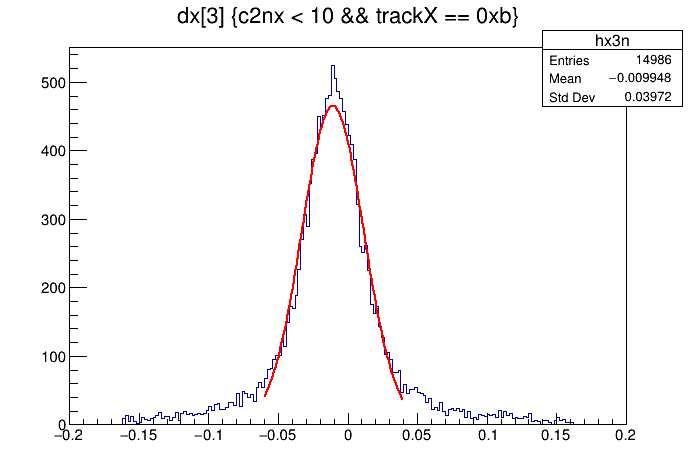

 FCN=141.417 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.20252e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.64472e+02   5.61867e+00   2.40856e-02   2.85987e-05
   2  Mean        -1.05263e-02   2.14266e-04   1.24836e-06   1.81980e-02
   3  Sigma        2.22357e-02   2.13520e-04   1.42702e-05   6.28482e-02


In [23]:
tree->Draw("dx[3]>>hx3n(200, -0.2, 0.2)", "c2nx < 10 && trackX == 0xb");
TH1D *hx3n = (TH1D*)gDirectory->Get("hx3n");
f1 = new TF1("f1", "gaus", -0.06, 0.04);
hx3n->Fit(f1, "R");
sigmaX[7] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC3 x

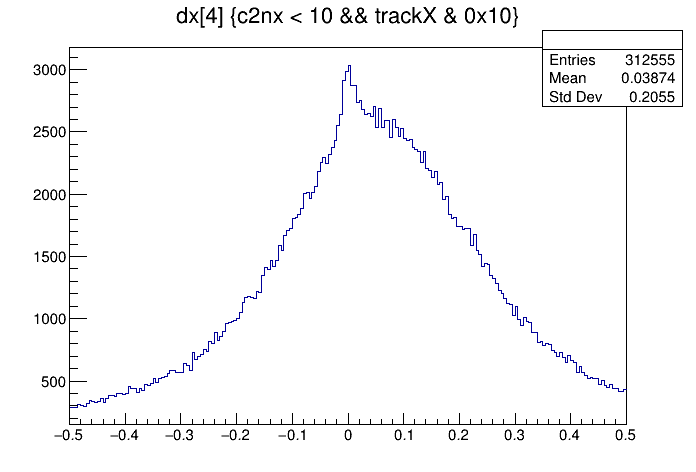

In [24]:
tree->Draw("dx[4]>>(200, -0.5, 0.5)", "c2nx < 10 && trackX & 0x10");
c1->Draw();

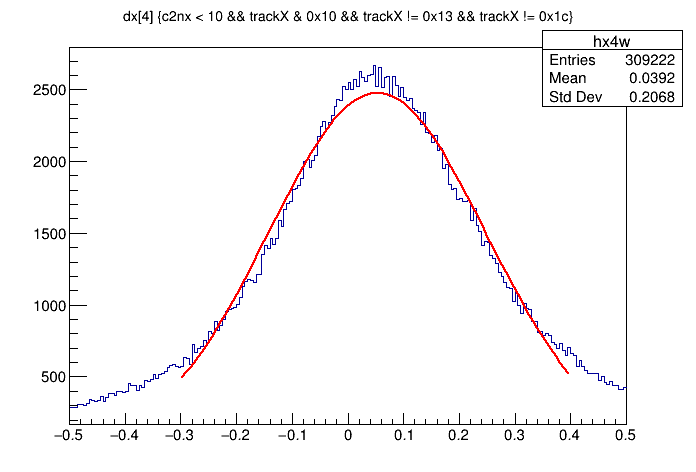

 FCN=739.198 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=2.18377e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.47451e+03   7.17869e+00   6.93991e-02   7.08230e-06
   2  Mean         5.34527e-02   4.95611e-04   6.57995e-06  -1.33878e-01
   3  Sigma        1.95066e-01   5.61572e-04   1.02763e-05   2.18087e-01


In [25]:
tree->Draw("dx[4]>>hx4w(200, -0.5, 0.5)", "c2nx < 10 && trackX & 0x10 && trackX != 0x13 && trackX != 0x1c");
TH1D *hx4w = (TH1D*)gDirectory->Get("hx4w");
f1 = new TF1("f1", "gaus", -0.3, 0.4);
hx4w->Fit(f1, "R");
sigmaX[8] = f1->GetParameter(2);
delete f1;
c1->Draw();

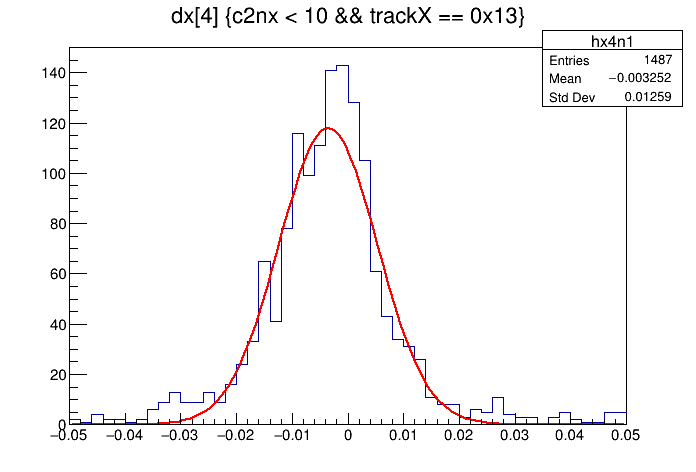

 FCN=155.441 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=2.14157e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.17761e+02   4.63863e+00   1.99063e-02   3.50238e-05
   2  Mean        -3.46835e-03   2.46689e-04   1.49529e-06   6.22468e-01
   3  Sigma        8.84585e-03   2.47869e-04   3.28893e-05   6.92702e-03


In [26]:
tree->Draw("dx[4]>>hx4n1(50, -0.05, 0.05)", "c2nx < 10 && trackX == 0x13");
TH1D *hx4n1 = (TH1D*)gDirectory->Get("hx4n1");
f1 = new TF1("f1", "gaus", -0.05, 0.05);
hx4n1->Fit(f1, "R");
sigmaX[9] = f1->GetParameter(2);
delete f1;
c1->Draw();

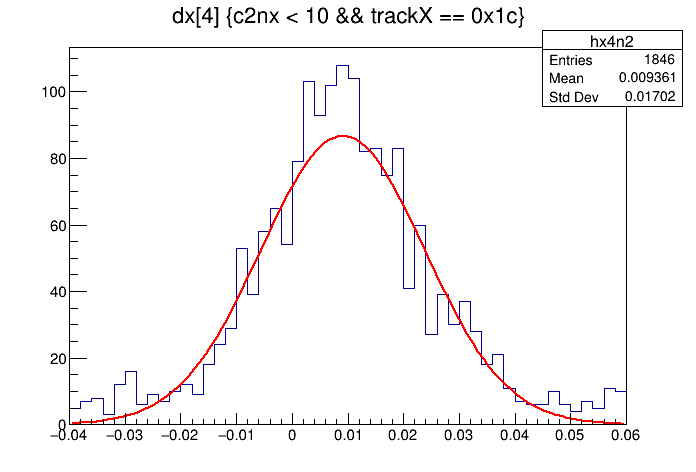

 FCN=149.322 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=6.94859e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.66753e+01   3.08016e+00   1.30097e-02  -6.74929e-05
   2  Mean         9.17864e-03   3.72806e-04   2.20883e-06   6.20094e-01
   3  Sigma        1.46524e-02   3.71841e-04   3.27413e-05  -5.59514e-02


In [27]:
tree->Draw("dx[4]>>hx4n2(50, -0.04, 0.06)", "c2nx < 10 && trackX == 0x1c");
TH1D *hx4n2 = (TH1D*)gDirectory->Get("hx4n2");
f1 = new TF1("f1", "gaus", -0.04, 0.06);
hx4n2->Fit(f1, "R");
sigmaX[10] = f1->GetParameter(2);
delete f1;
c1->Draw();

## y方向残差

### PPAC1A y

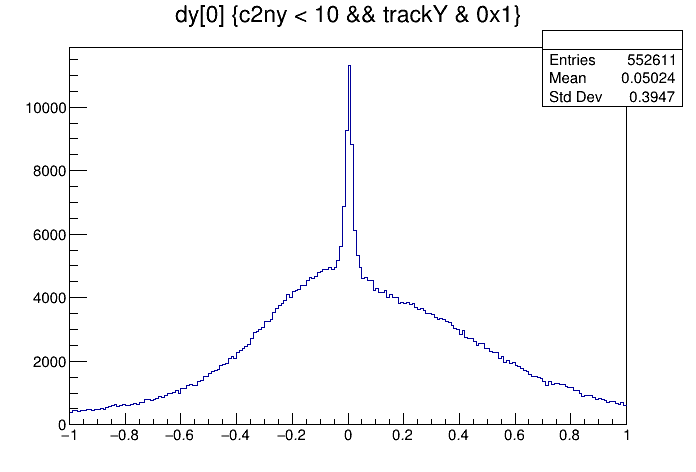

In [28]:
tree->Draw("dy[0]>>(200, -1, 1)", "c2ny < 10 && trackY & 0x1");
c1->Draw();

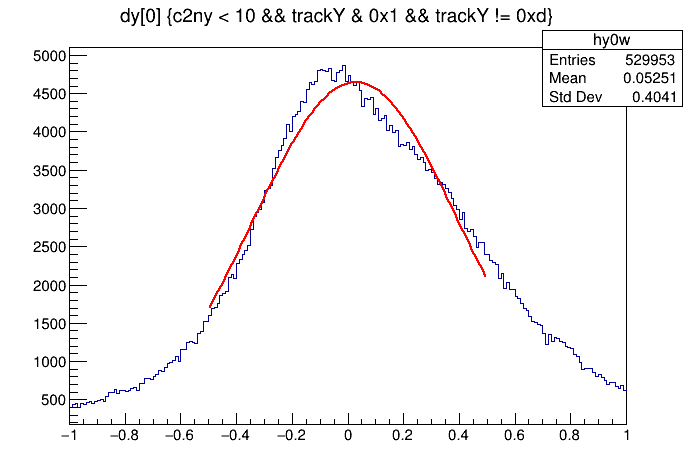

 FCN=1436.58 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=3.57764e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.64553e+03   1.08639e+01   1.15932e-02   4.21301e-07
   2  Mean         2.93804e-02   9.40635e-04   1.74066e-07   1.08106e-03
   3  Sigma        3.70773e-01   1.29233e-03  -1.36856e-06   1.30319e-03


In [29]:
tree->Draw("dy[0]>>hy0w(200, -1, 1)", "c2ny < 10 && trackY & 0x1 && trackY != 0xd");
TH1D *hy0w = (TH1D*)gDirectory->Get("hy0w");
f1 = new TF1("f1", "gaus", -0.5, 0.5);
hy0w->Fit(f1, "R");
sigmaY[0] = f1->GetParameter(2);
delete f1;
c1->Draw();

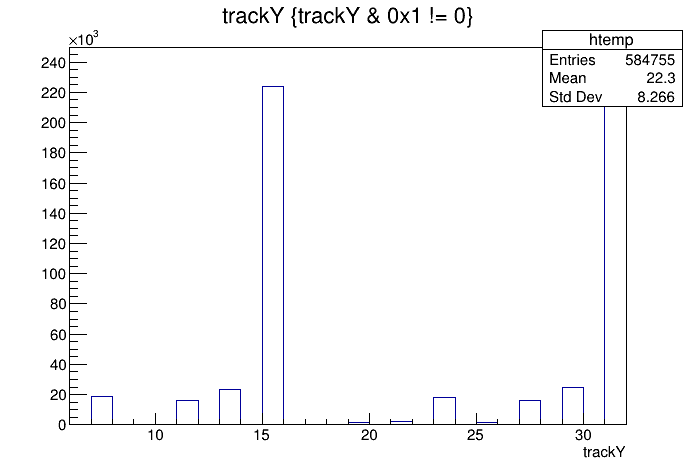

In [30]:
tree->Draw("trackY", "trackY & 0x1 != 0");
c1->Draw();

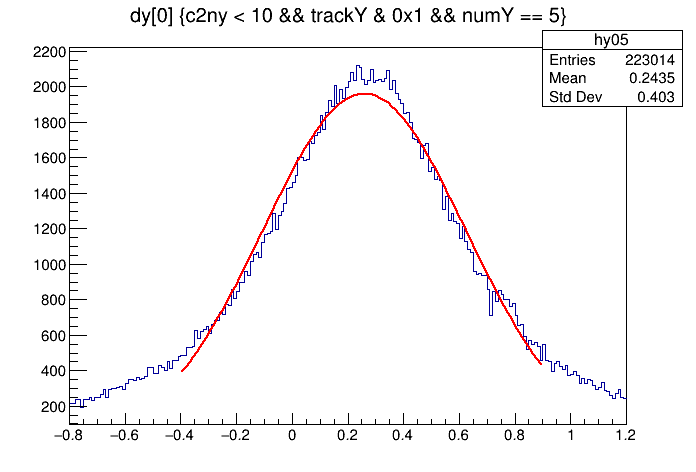

 FCN=685.399 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=4.46883e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.95896e+03   6.62747e+00   6.15294e-02   1.89665e-05
   2  Mean         2.60655e-01   1.08436e-03   1.38685e-05  -2.19297e-02
   3  Sigma        3.65336e-01   1.24214e-03   1.16895e-05   7.68703e-02


In [31]:
tree->Draw("dy[0]>>hy05(200, -0.8, 1.2)", "c2ny < 10 && trackY & 0x1 && numY == 5");
TH1D *hy05 = (TH1D*)gDirectory->Get("hy05");
f1 = new TF1("f1", "gaus", -0.4, 0.9);
hy05->Fit(f1, "R");
sigmaY[0] = f1->GetParameter(2);
delete f1;
c1->Draw();

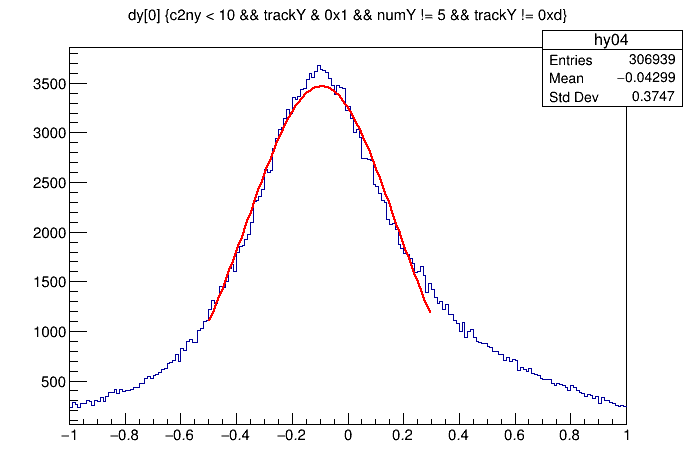

 FCN=499.618 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=9.89373e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.46426e+03   1.08549e+01   8.44960e-02   9.85164e-06
   2  Mean        -9.39896e-02   8.04529e-04   8.76151e-06  -1.74479e+00
   3  Sigma        2.66739e-01   1.06471e-03   1.22244e-05   3.35501e-02


In [32]:
tree->Draw("dy[0]>>hy04(200, -1, 1)", "c2ny < 10 && trackY & 0x1 && numY != 5 && trackY != 0xd");
TH1D *hy04 = (TH1D*)gDirectory->Get("hy04");
f1 = new TF1("f1", "gaus", -0.5, 0.3);
hy04->Fit(f1, "R");
sigmaY[1] = f1->GetParameter(2);
delete f1;
c1->Draw();

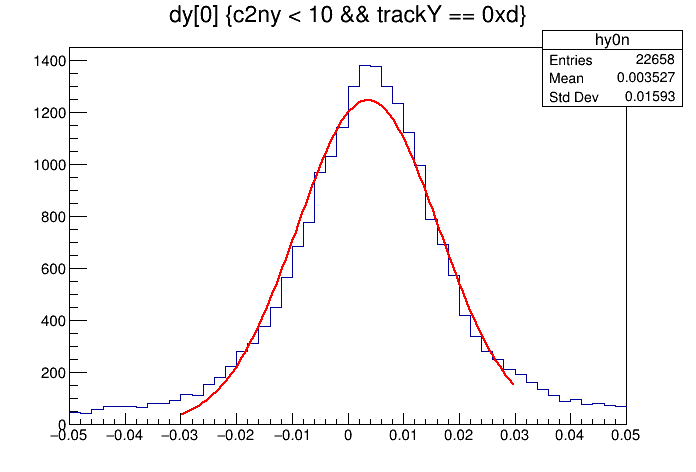

 FCN=244.156 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=5.68354e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.24593e+03   1.22268e+01   6.83700e-02   1.60539e-05
   2  Mean         3.68731e-03   9.81150e-05   7.49503e-07   5.17201e-01
   3  Sigma        1.27260e-02   9.80480e-05   1.48257e-05   1.63330e-01


In [33]:
tree->Draw("dy[0]>>hy0n(50, -0.05, 0.05)", "c2ny < 10 && trackY == 0xd");
TH1D *hy0n = (TH1D*)gDirectory->Get("hy0n");
f1 = new TF1("f1", "gaus", -0.03, 0.03);
hy0n->Fit(f1, "R");
sigmaY[2] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC1B y

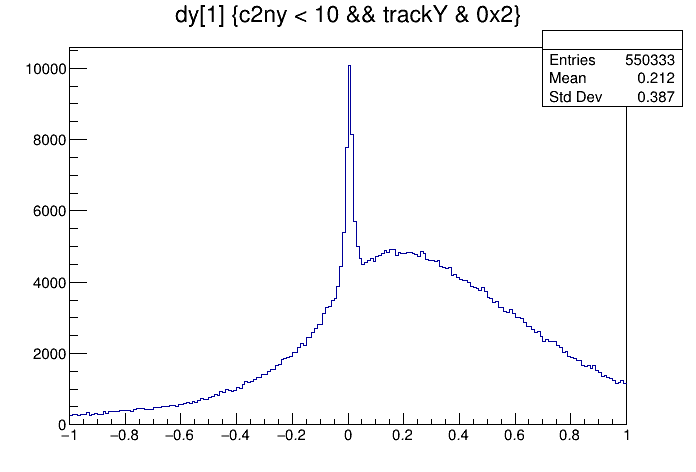

In [34]:
tree->Draw("dy[1]>>(200, -1, 1)", "c2ny < 10 && trackY & 0x2");
c1->Draw();

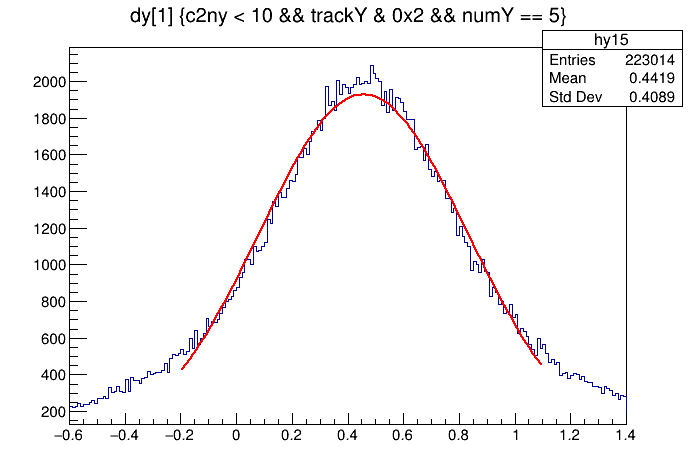

 FCN=459.203 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=5.78273e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.92806e+03   6.50233e+00   4.95380e-02  -1.31280e-05
   2  Mean         4.57426e-01   1.12935e-03   1.18277e-05  -3.41142e-03
   3  Sigma        3.75106e-01   1.30765e-03   9.92446e-06   2.24009e-02


In [35]:
tree->Draw("dy[1]>>hy15(200, -0.6, 1.4)", "c2ny < 10 && trackY & 0x2 && numY == 5");
TH1D *hy15 = (TH1D*)gDirectory->Get("hy15");
f1 = new TF1("f1", "gaus", -0.2, 1.1);
hy15->Fit(f1, "R");
sigmaY[3] = f1->GetParameter(2);
delete f1;
c1->Draw();

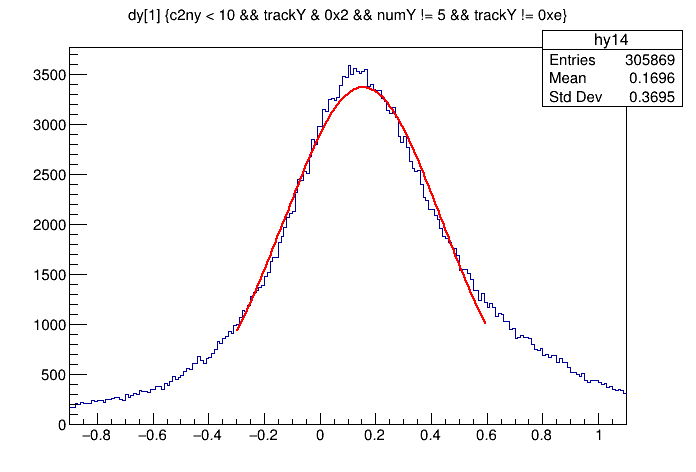

 FCN=581.939 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=2.08786e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.37015e+03   1.01595e+01   1.61602e-03  -9.96678e-07
   2  Mean         1.55967e-01   7.98226e-04  -8.86071e-07  -4.47040e-04
   3  Sigma        2.82949e-01   9.95820e-04  -1.39309e-06  -1.70108e-03


In [36]:
tree->Draw("dy[1]>>hy14(200, -0.9, 1.1)", "c2ny < 10 && trackY & 0x2 && numY != 5 && trackY != 0xe");
TH1D *hy14 = (TH1D*)gDirectory->Get("hy14");
f1 = new TF1("f1", "gaus", -0.3, 0.6);
hy14->Fit(f1, "R");
sigmaY[4] = f1->GetParameter(2);
delete f1;
c1->Draw();

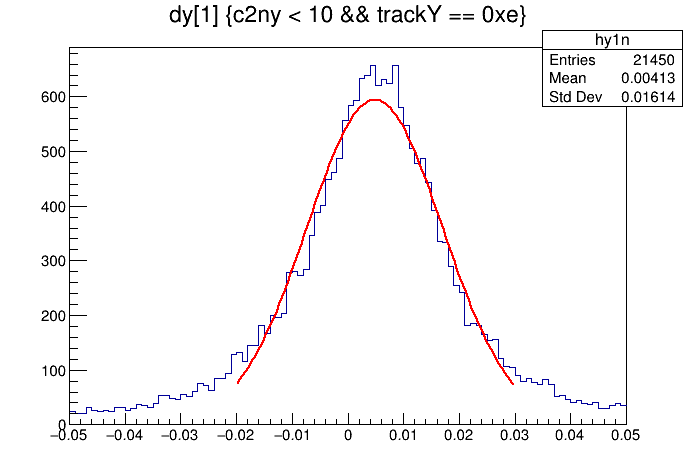

 FCN=187.466 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=4.27317e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.93876e+02   6.19880e+00   3.01837e-02  -2.00516e-05
   2  Mean         4.91372e-03   1.03803e-04   6.94680e-07  -1.21673e+00
   3  Sigma        1.21716e-02   1.10110e-04   1.55918e-05   4.84332e-02


In [37]:
tree->Draw("dy[1]>>hy1n(100, -0.05, 0.05)", "c2ny < 10 && trackY == 0xe");
TH1D *hy1n = (TH1D*)gDirectory->Get("hy1n");
f1 = new TF1("f1", "gaus", -0.02, 0.03);
hy1n->Fit(f1, "R");
sigmaY[5] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC2A y

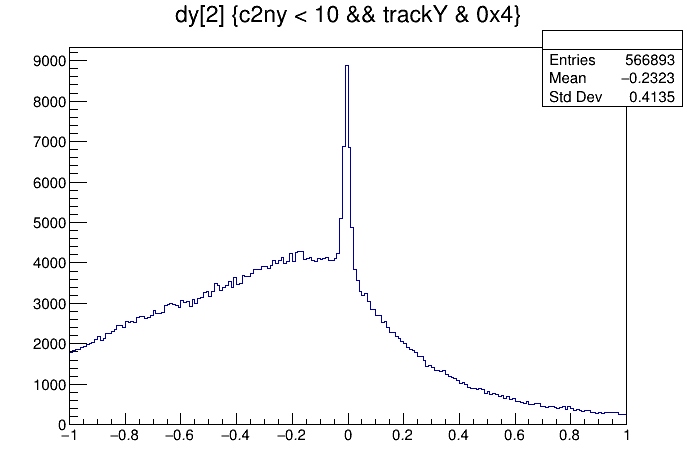

In [38]:
tree->Draw("dy[2]>>(200, -1, 1)", "c2ny < 10 && trackY & 0x4");
c1->Draw();

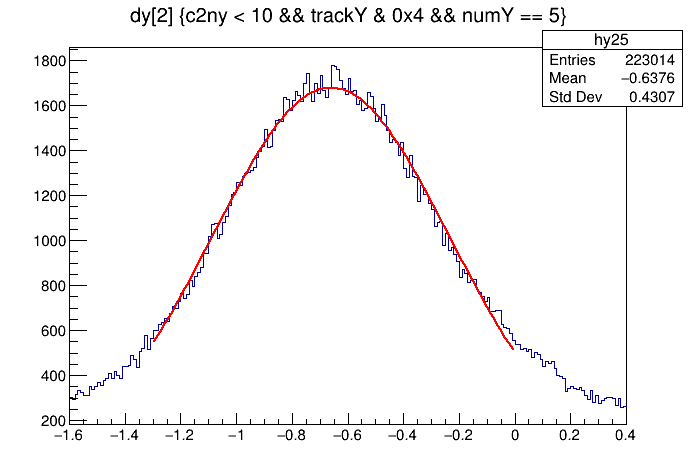

 FCN=201.217 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=7.57522e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.67877e+03   5.88507e+00   7.97894e-03  -5.97189e-06
   2  Mean        -6.59614e-01   1.43070e-03  -3.70739e-07   5.93135e-03
   3  Sigma        4.25390e-01   1.82555e-03  -1.93149e-06   1.24776e-02


In [39]:
tree->Draw("dy[2]>>hy25(200, -1.6, 0.4)", "c2ny < 10 && trackY & 0x4 && numY == 5");
TH1D *hy25 = (TH1D*)gDirectory->Get("hy25");
f1 = new TF1("f1", "gaus", -1.3, 0.0);
hy25->Fit(f1, "R");
sigmaY[6] = f1->GetParameter(2);
delete f1;
c1->Draw();

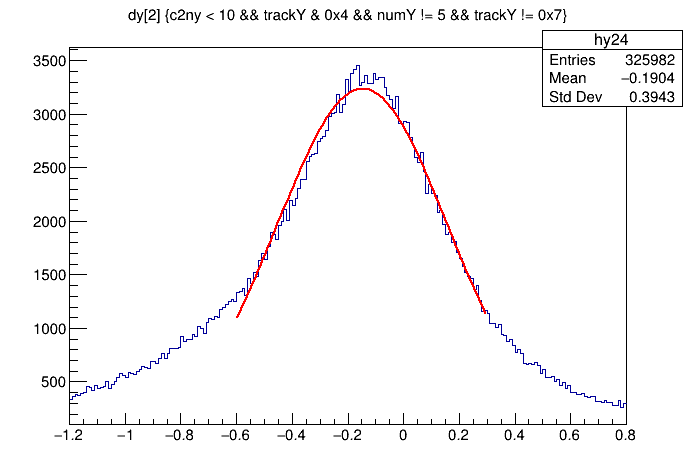

 FCN=407.102 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=3.09004e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.23363e+03   9.80052e+00  -1.25996e-02   1.02802e-06
   2  Mean        -1.46258e-01   9.06964e-04   1.16164e-07  -3.32247e-03
   3  Sigma        3.06384e-01   1.21106e-03   7.02318e-07  -2.01845e-04


In [40]:
tree->Draw("dy[2]>>hy24(200, -1.2, 0.8)", "c2ny < 10 && trackY & 0x4 && numY != 5 && trackY != 0x7");
TH1D *hy24 = (TH1D*)gDirectory->Get("hy24");
f1 = new TF1("f1", "gaus", -0.6, 0.3);
hy24->Fit(f1, "R");
sigmaY[7] = f1->GetParameter(2);
delete f1;
c1->Draw();

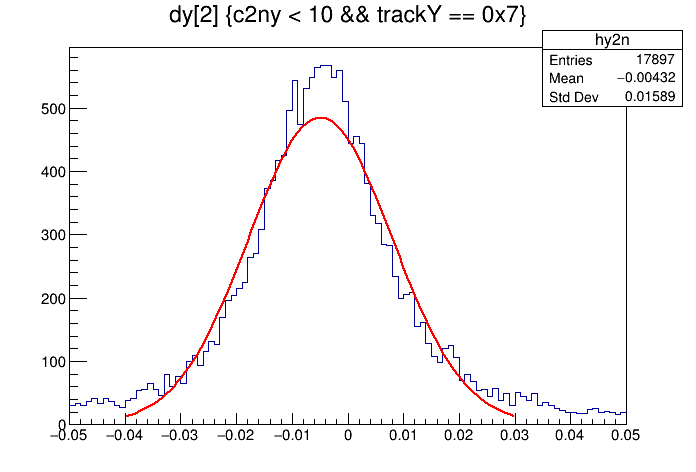

 FCN=478.913 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=5.84813e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.84539e+02   5.44956e+00   4.15628e-02  -2.95843e-05
   2  Mean        -4.84199e-03   1.06310e-04   1.13692e-06   9.08030e-01
   3  Sigma        1.28882e-02   1.07477e-04   2.11340e-05   6.95100e-02


In [41]:
tree->Draw("dy[2]>>hy2n(100, -0.05, 0.05)", "c2ny < 10 && trackY == 0x7");
TH1D *hy2n = (TH1D*)gDirectory->Get("hy2n");
f1 = new TF1("f1", "gaus", -0.04, 0.03);
hy2n->Fit(f1, "R");
sigmaY[8] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC2B y

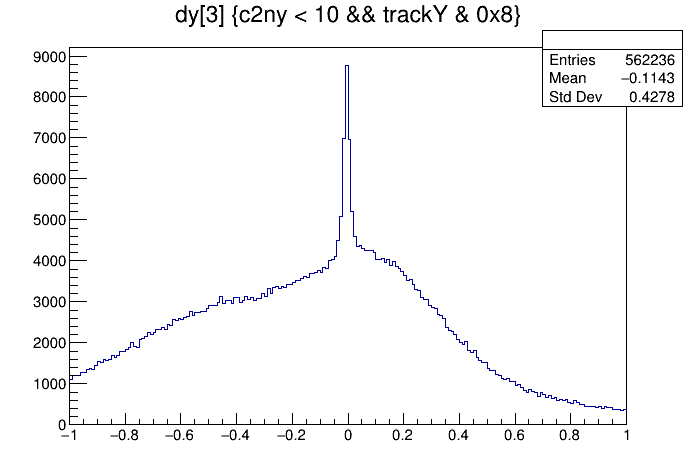

In [42]:
tree->Draw("dy[3]>>(200, -1, 1)", "c2ny < 10 && trackY & 0x8");
c1->Draw();

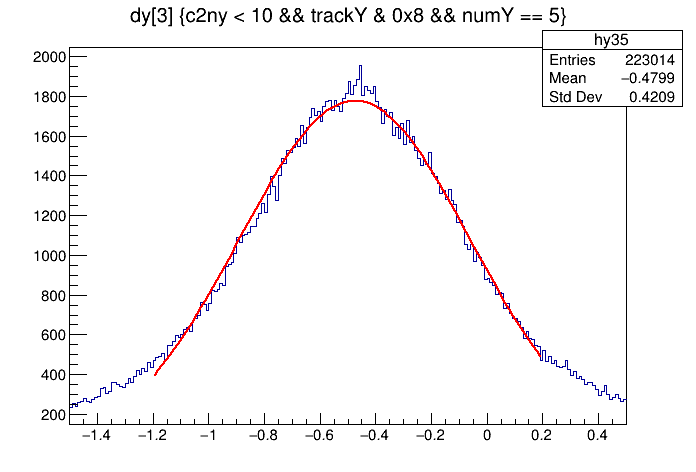

 FCN=269.743 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=2.52227e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.77517e+03   5.93254e+00   3.48218e-02  -2.93248e-05
   2  Mean        -4.74160e-01   1.26956e-03   1.01743e-05   1.40420e-02
   3  Sigma        4.15491e-01   1.47966e-03   7.87925e-06   4.81298e-02


In [43]:
tree->Draw("dy[3]>>hy35(200, -1.5, 0.5)", "c2ny < 10 && trackY & 0x8 && numY == 5");
TH1D *hy35 = (TH1D*)gDirectory->Get("hy35");
f1 = new TF1("f1", "gaus", -1.2, 0.2);
hy35->Fit(f1, "R");
sigmaY[9] = f1->GetParameter(2);
delete f1;
c1->Draw();

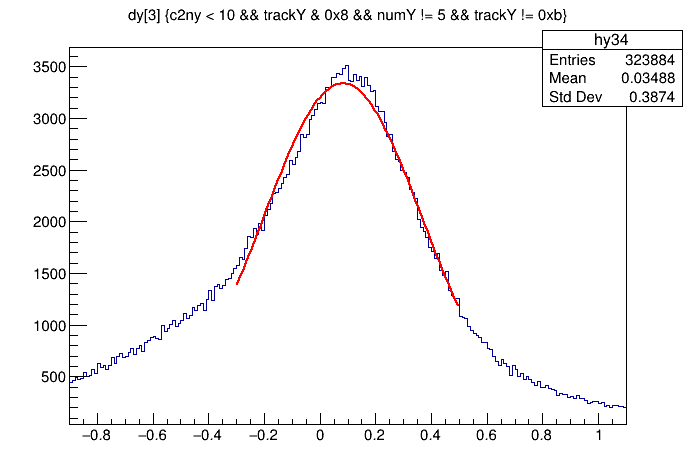

 FCN=345.405 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=1.01524e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.33466e+03   1.04574e+01   6.76778e-02   1.47906e-05
   2  Mean         8.32627e-02   9.21942e-04   8.25698e-06  -1.98737e-02
   3  Sigma        2.86914e-01   1.27768e-03   1.16012e-05   1.06588e-01


In [44]:
tree->Draw("dy[3]>>hy34(200, -0.9, 1.1)", "c2ny < 10 && trackY & 0x8 && numY != 5 && trackY != 0xb");
TH1D *hy34 = (TH1D*)gDirectory->Get("hy34");
f1 = new TF1("f1", "gaus", -0.3, 0.5);
hy34->Fit(f1, "R");
sigmaY[10] = f1->GetParameter(2);
delete f1;
c1->Draw();

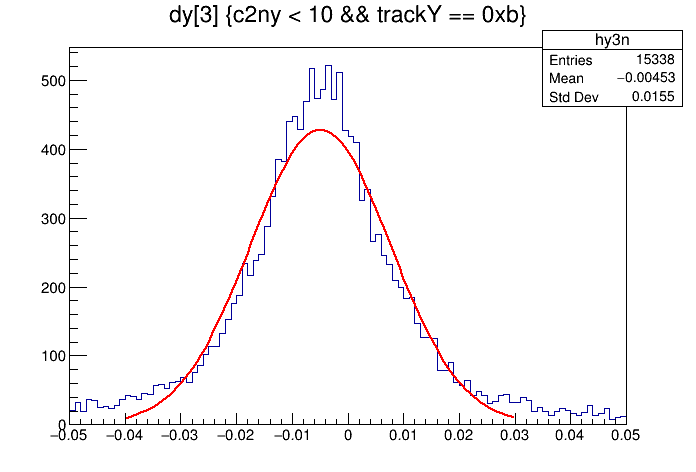

 FCN=416.951 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=5.86145e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.27185e+02   5.13468e+00   3.67826e-02  -2.50404e-04
   2  Mean        -4.83844e-03   1.11571e-04   1.11368e-06  -2.42944e+00
   3  Sigma        1.26214e-02   1.10902e-04   2.08259e-05  -4.80601e-01


In [45]:
tree->Draw("dy[3]>>hy3n(100, -0.05, 0.05)", "c2ny < 10 && trackY == 0xb");
TH1D *hy3n = (TH1D*)gDirectory->Get("hy3n");
f1 = new TF1("f1", "gaus", -0.04, 0.03);
hy3n->Fit(f1, "R");
sigmaY[11] = f1->GetParameter(2);
delete f1;
c1->Draw();

### PPAC3 y

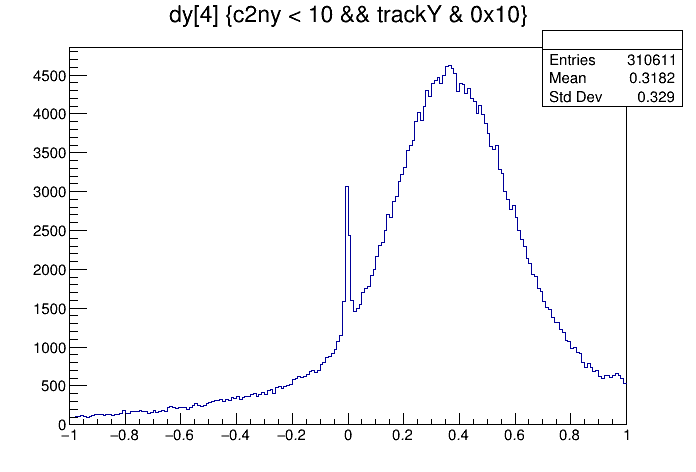

In [46]:
tree->Draw("dy[4]>>(200, -1, 1)", "c2ny < 10 && trackY & 0x10");
c1->Draw();

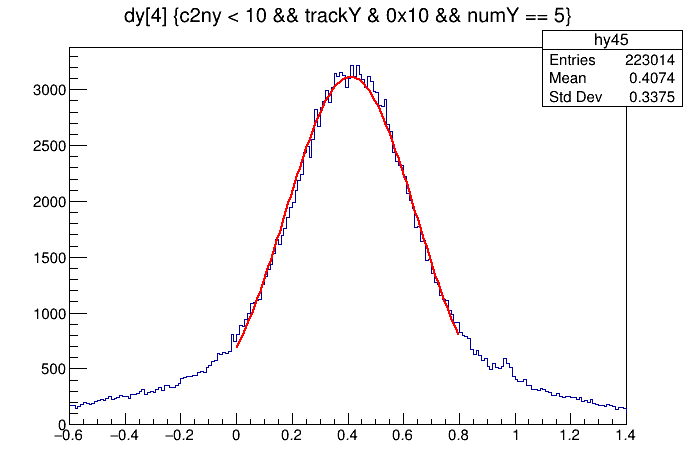

 FCN=259.949 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=2.08078e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.10921e+03   1.04240e+01   6.00426e-02   2.51281e-05
   2  Mean         4.11122e-01   7.14267e-04   5.62881e-06  -1.04524e-01
   3  Sigma        2.34976e-01   8.28543e-04   7.63599e-06   1.41215e-01


In [47]:
tree->Draw("dy[4]>>hy45(200, -0.6, 1.4)", "c2ny < 10 && trackY & 0x10 && numY == 5");
TH1D *hy45 = (TH1D*)gDirectory->Get("hy45");
f1 = new TF1("f1", "gaus", 0.0, 0.8);
hy45->Fit(f1, "R");
sigmaY[12] = f1->GetParameter(2);
delete f1;
c1->Draw();

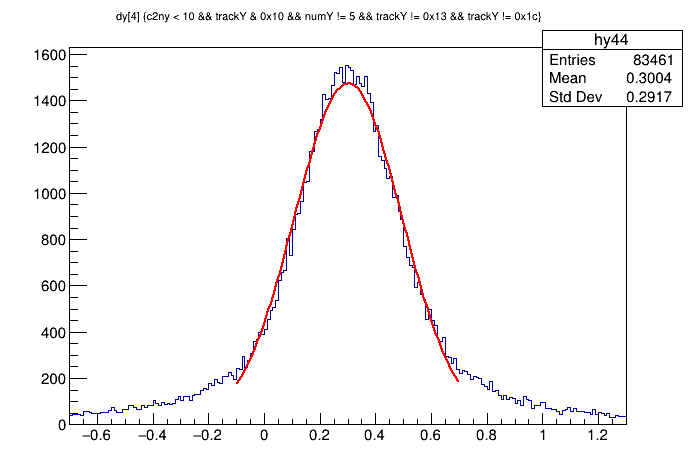

 FCN=289.256 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=3.62656e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.47327e+03   7.56721e+00   4.67554e-02   4.40115e-07
   2  Mean         3.02656e-01   8.27511e-04   6.88005e-06  -3.23994e-02
   3  Sigma        1.93567e-01   8.35092e-04   9.44689e-06   1.22002e-03


In [48]:
tree->Draw("dy[4]>>hy44(200, -0.7, 1.3)", "c2ny < 10 && trackY & 0x10 && numY != 5 && trackY != 0x13 && trackY != 0x1c");
TH1D *hy44 = (TH1D*)gDirectory->Get("hy44");
f1 = new TF1("f1", "gaus", -0.1, 0.7);
hy44->Fit(f1, "R");
sigmaY[13] = f1->GetParameter(2);
delete f1;
c1->Draw();

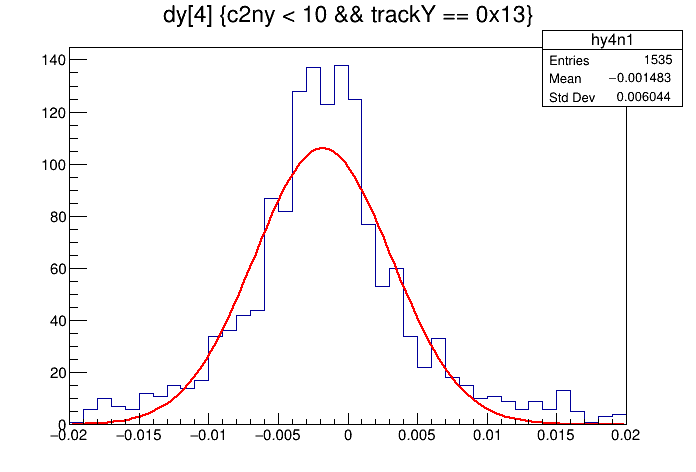

 FCN=156.558 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=1.06586e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.05902e+02   4.71345e+00   1.79500e-02  -9.37287e-06
   2  Mean        -1.77231e-03   1.36340e-04   8.35642e-07   2.70093e-01
   3  Sigma        4.92579e-03   1.71982e-04   3.95628e-05  -3.76524e-03


In [49]:
tree->Draw("dy[4]>>hy4n1(40, -0.02, 0.02)", "c2ny < 10 && trackY == 0x13");
TH1D *hy4n1 = (TH1D*)gDirectory->Get("hy4n1");
f1 = new TF1("f1", "gaus", -0.02, 0.02);
hy4n1->Fit(f1, "R");
sigmaY[14] = f1->GetParameter(2);
delete f1;
c1->Draw();

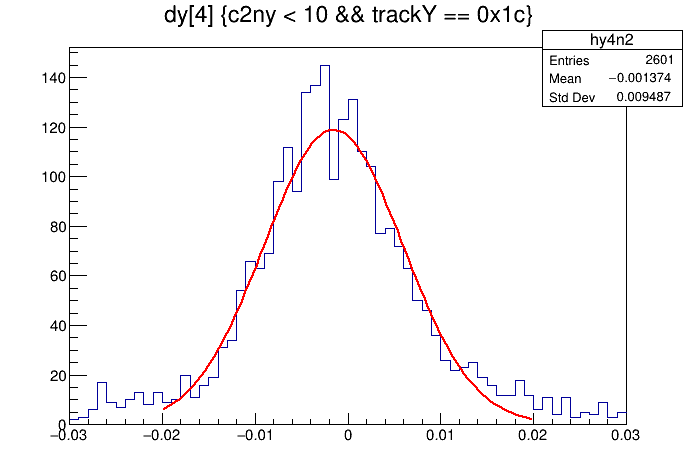

 FCN=84.1461 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=8.4209e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.18698e+02   3.43726e+00   1.13689e-02  -7.66546e-08
   2  Mean        -1.49318e-03   1.68042e-04   7.43804e-07  -2.41675e-01
   3  Sigma        7.50390e-03   1.57555e-04   2.28076e-05   2.44403e-03


In [50]:
tree->Draw("dy[4]>>hy4n2(60, -0.03, 0.03)", "c2ny < 10 && trackY == 0x1c");
TH1D *hy4n2 = (TH1D*)gDirectory->Get("hy4n2");
f1 = new TF1("f1", "gaus", -0.02, 0.02);
hy4n2->Fit(f1, "R");
sigmaY[15] = f1->GetParameter(2);
delete f1;
c1->Draw();

## 小结

x和y方向的的残差分布中比较宽的高斯峰的$\sigma$

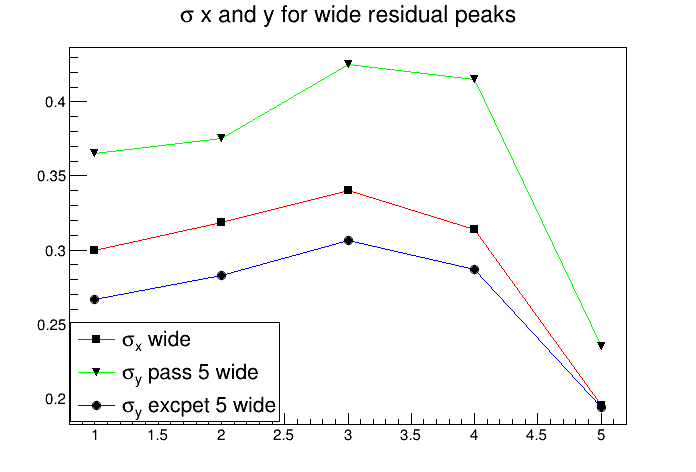

In [51]:
TMultiGraph *mgw = new TMultiGraph;
mgw->SetTitle("#sigma x and y for wide residual peaks");
TGraph *gxw = new TGraph;
TGraph *gy5 = new TGraph;
TGraph *gy4 = new TGraph;
for (int i = 0; i != 5; ++i) {
    gxw->SetPoint(i, i+1, sigmaX[i<<1]);
    gy5->SetPoint(i, i+1, sigmaY[i*3]);
    gy4->SetPoint(i, i+1, sigmaY[i*3+1]);
}

gxw->SetTitle("#sigma_{x} wide");
gxw->SetLineColor(kRed);
gxw->SetMarkerStyle(21);
mgw->Add(gxw);

gy5->SetTitle("#sigma_{y} pass 5 wide");
gy5->SetLineColor(kGreen);
gy5->SetMarkerStyle(23);
mgw->Add(gy5);

gy4->SetTitle("#sigma_{y} excpet 5 wide");
gy4->SetLineColor(kBlue);
gy4->SetMarkerStyle(20);
mgw->Add(gy4);

mgw->Draw("APL");
TLegend *legend = c1->BuildLegend();
c1->Draw();

上图中，红线表示x方向的宽的峰的分辨，绿线表示y方向穿过5个探测器的径迹的残差分布的分辨，蓝色是y方向，没有穿过5个探测器并且没有不是窄峰组合的

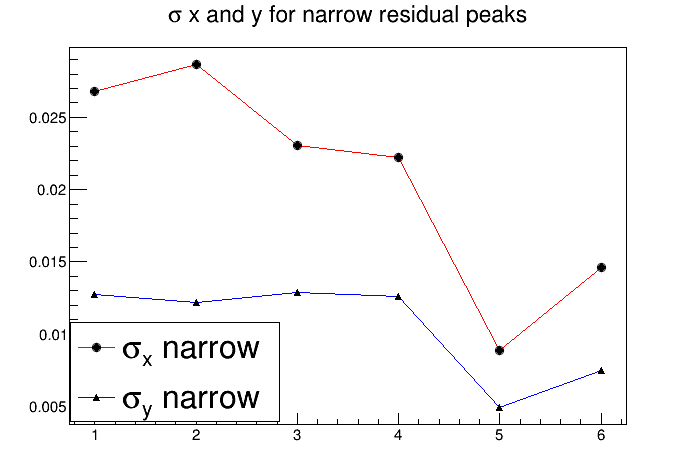

In [52]:
%jsroot off
TMultiGraph *mgn = new TMultiGraph;
mgn->SetTitle("#sigma x and y for narrow residual peaks");
TGraph *gxn = new TGraph;
TGraph *gyn = new TGraph;
for (int i = 0; i != 5; ++i) {
    gxn->SetPoint(i, i+1, sigmaX[(i<<1)+1]);
    gyn->SetPoint(i, i+1, sigmaY[i*3+2]);
}
gxn->SetPoint(5, 6, sigmaX[10]);
gyn->SetPoint(5, 6, sigmaY[15]);

gxn->SetTitle("#sigma_{x} narrow");
gxn->SetLineColor(kRed);
gxn->SetMarkerStyle(20);
mgn->Add(gxn);

gyn->SetTitle("#sigma_{y} narrow");
gyn->SetLineColor(kBlue);
gyn->SetMarkerStyle(22);
mgn->Add(gyn);

mgn->Draw("APL");
c1->BuildLegend();
c1->Draw();


## 穿过5个探测器的残差分析

### x方向

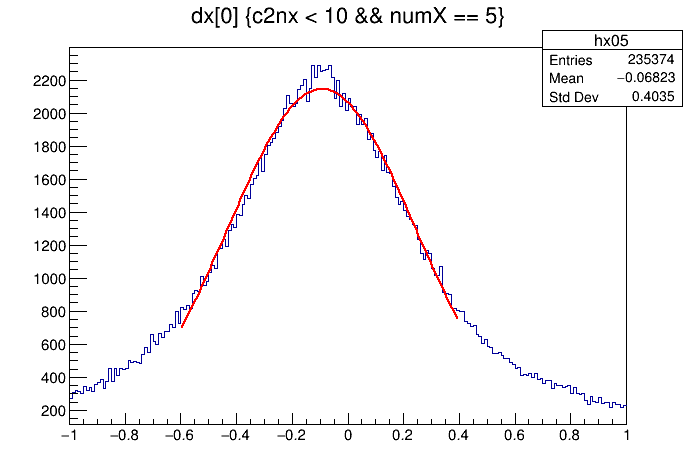

 FCN=235.074 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=2.24585e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.14295e+03   7.57208e+00   2.18005e-02  -2.50482e-05
   2  Mean        -9.22215e-02   1.15800e-03   1.16702e-06  -8.11982e-02
   3  Sigma        3.36971e-01   1.52919e-03  -4.40415e-06   5.77278e-02


In [53]:
tree->Draw("dx[0]>>hx05(200, -1, 1)", "c2nx < 10 && numX == 5");
TH1D *hx05 = (TH1D*)gDirectory->Get("hx05");
f1 = new TF1("f1", "gaus", -0.6, 0.4);
hx05->Fit(f1, "R");
sigmaAllX[0] = f1->GetParameter(2);
delete f1;
c1->Draw();

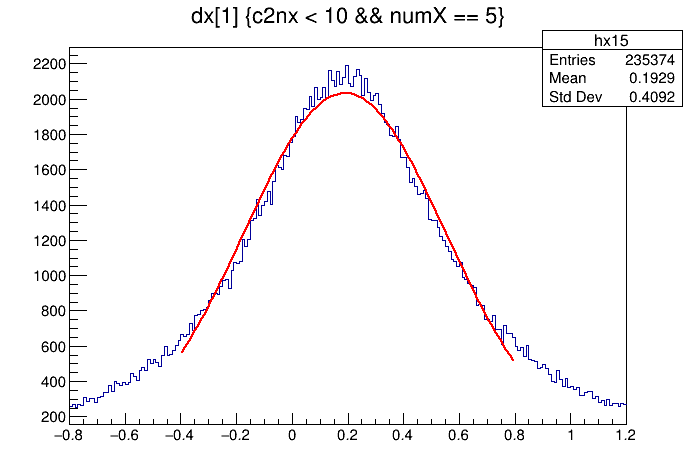

 FCN=488.855 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=1.77301e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.03171e+03   6.90043e+00   5.36787e-02  -6.73360e-05
   2  Mean         1.90710e-01   1.13275e-03   1.22360e-05   4.06289e-02
   3  Sigma        3.65249e-01   1.38477e-03   1.12267e-05   1.16987e-01


In [54]:
tree->Draw("dx[1]>>hx15(200, -0.8, 1.2)", "c2nx < 10 && numX == 5");
TH1D *hx15 = (TH1D*)gDirectory->Get("hx15");
f1 = new TF1("f1", "gaus", -0.4, 0.8);
hx15->Fit(f1, "R");
sigmaAllX[1] = f1->GetParameter(2);
delete f1;
c1->Draw();

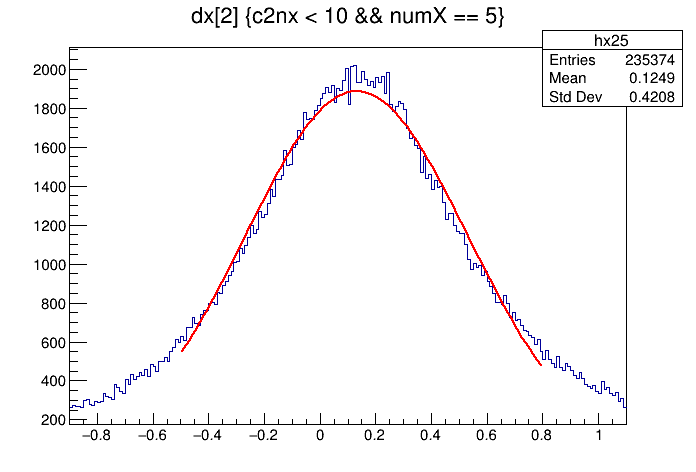

 FCN=445.239 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=2.41361e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.88503e+03   6.36599e+00   4.72786e-02  -8.64500e-05
   2  Mean         1.32897e-01   1.24077e-03   1.27818e-05   2.52091e-02
   3  Sigma        3.99483e-01   1.52463e-03   1.08240e-05   1.29527e-01


In [55]:
tree->Draw("dx[2]>>hx25(200, -0.9, 1.1)", "c2nx < 10 && numX == 5");
TH1D *hx25 = (TH1D*)gDirectory->Get("hx25");
f1 = new TF1("f1", "gaus", -0.5, 0.8);
hx25->Fit(f1, "R");
sigmaAllX[2] = f1->GetParameter(2);
delete f1;
c1->Draw();

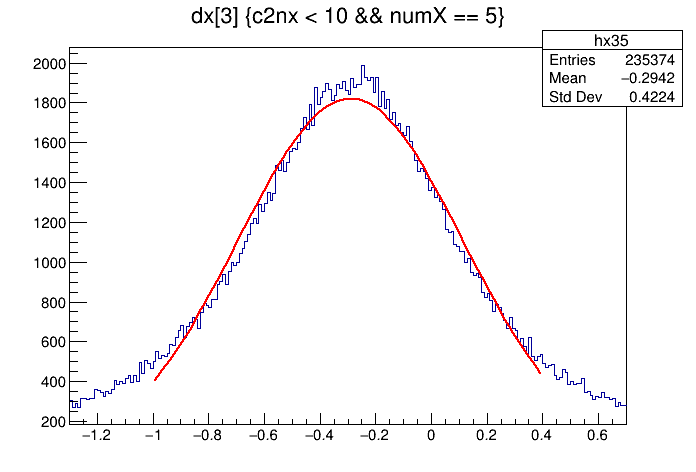

 FCN=569.059 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=1.13588e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.81930e+03   6.11138e+00   5.15493e-02  -1.94208e-05
   2  Mean        -2.89336e-01   1.21191e-03   1.41268e-05  -1.24770e-03
   3  Sigma        4.05394e-01   1.42181e-03   1.10674e-05   3.19602e-02


In [56]:
tree->Draw("dx[3]>>hx35(200, -1.3, 0.7)", "c2nx < 10 && numX == 5");
TH1D *hx35 = (TH1D*)gDirectory->Get("hx35");
f1 = new TF1("f1", "gaus", -1.0, 0.4);
hx35->Fit(f1, "R");
sigmaAllX[3] = f1->GetParameter(2);
delete f1;
c1->Draw();

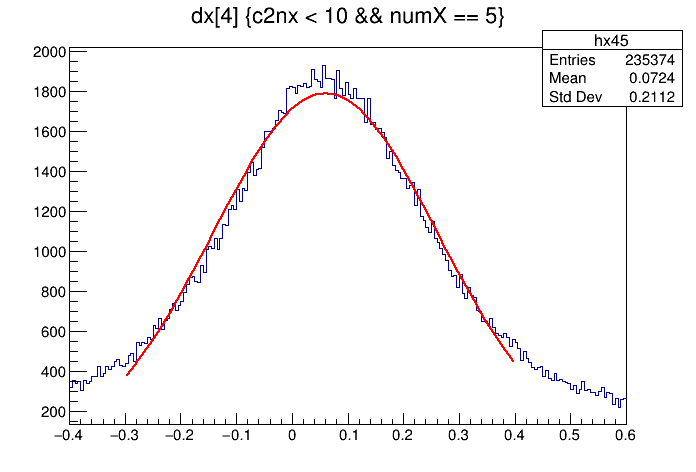

 FCN=484.963 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=2.73745e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.78758e+03   6.04164e+00   4.71807e-02   5.10317e-05
   2  Mean         6.02777e-02   6.12785e-04   6.58362e-06  -1.19938e-01
   3  Sigma        2.02764e-01   7.14418e-04   1.02846e-05   1.64970e-01


In [57]:
tree->Draw("dx[4]>>hx45(200, -0.4, 0.6)", "c2nx < 10 && numX == 5");
TH1D *hx45 = (TH1D*)gDirectory->Get("hx45");
f1 = new TF1("f1", "gaus", -0.3, 0.4);
hx45->Fit(f1, "R");
sigmaAllX[4] = f1->GetParameter(2);
delete f1;
c1->Draw();

### y方向

In [58]:
for (int i = 0; i != 5; ++i) {
    sigmaAllY[i] = sigmaY[i*3];
}

### 小结

In [59]:
cout << "sigmaX    sigmaY" << endl;
for (int i = 0; i != 5; ++i) {
    cout << sigmaAllX[i] << "  " << sigmaAllY[i] << endl;
}

sigmaX    sigmaY
0.336971  0.365336
0.365249  0.375106
0.399483  0.42539
0.405394  0.415491
0.202764  0.234976
